# Neural Network for Cancer Prediction using RNA-Seq Data
The data used for this tutorial is an RNA-seq gene expression data for different cancer types. The rows represent cancer samples and the columns represent gene count values. The last column contains the cancer categories.

Data Source: https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

# Importing Libraries


In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the Data

In [2]:
dataframe = pd.read_csv("cancer_gene_expression.csv")

# EDA and Data Cleaning

In [3]:
#Let's check the number of samples and features
#Note:the last column contain the labels. it is not considered as a feature

print(dataframe.shape)

(801, 8001)


In [4]:
#let's check some of the columns (first, second and third columns)
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [5]:
#lets check the name of the last column of this dataframe

dataframe.columns[-1]

'Cancer_Type'

In [6]:
#check for missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [7]:
#let's check how many different cancer types are there in the data
#note: in this tutorial the cancer types will be referred to as classes or labels

print(dataframe['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


We can see that there are 5 classes/cancer types. And you can also see the number of samples diagnosed with a cancer type

# Data Preprocessing

In [8]:
#we will now seperate the feature values from the class. we do this because scikit-learn requires that features and class are separated before parsing them to the classifiers.
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

Encode labels

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [9]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

Data Splitting

Data is split into three: Training, Validation and Test sets

1.Training set is used for training

2.Validation set is used for evaluating the model during training.

3.Test set is used to test the model after training and tuning has been completed.

In [10]:
#split data into training,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

Data Normalization

Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias. Normalization is performed separately on each data set. This is done to prevent data leakage.

In [11]:
### scale the data between 0-1

In [12]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

# Build the Neural Network Model

In [13]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 1.5655 - sparse_categorical_accuracy: 0.3480 - val_loss: 0.8687 - val_sparse_categorical_accuracy: 0.8047
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8877 - sparse_categorical_accuracy: 0.7595 - val_loss: 0.5332 - val_sparse_categorical_accuracy: 0.8516
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5102 - sparse_categorical_accuracy: 0.9050 - val_loss: 0.2994 - val_sparse_categorical_accuracy: 0.9688
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2926 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.2091 - val_sparse_categorical_accuracy: 0.9609
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1458 - sparse_categorical_accuracy: 0.9996 - val_loss: 0.1370 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9992 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 0.9922
Epoch 

In [15]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [16]:
#get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:1 ,actual:1
predicted:4 ,actual:4
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:2 ,actual:2
predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:1 ,actual:1
predicted:2 ,actual:2


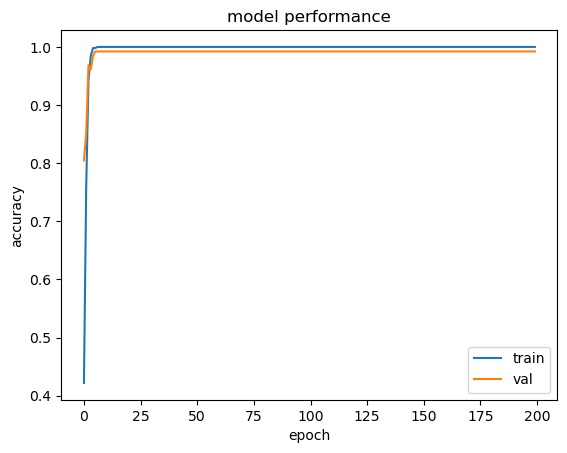

In [17]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

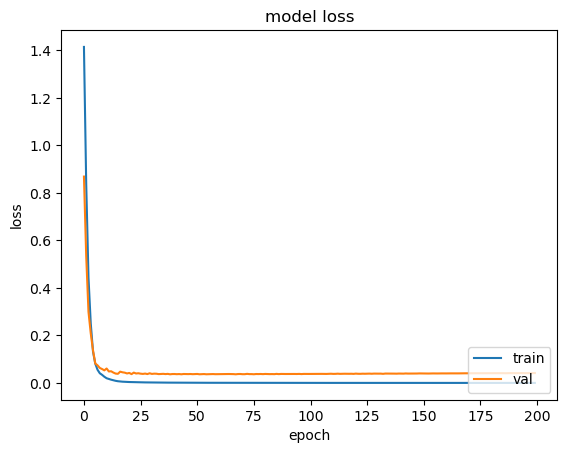

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()